# 1. Importing packages

In [1]:
#For data manipulation
import numpy as np
import pandas as pd

#For data visualization
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

In [2]:
#Importing primary data
primary_data = pd.read_csv('summer_olympics.csv')

In [3]:
#Importing supportive data
region = pd.read_csv('noc_regions.csv')

In [4]:
#Importing supportive data
gdp = pd.read_csv('gdp_data.csv')

In [5]:
#Importing supportive data
happiness = pd.read_csv('2017_happiness.csv')

In [6]:
#mporting supportiive data
host = pd.read_csv('olym_host.csv')

In [7]:
#Importing supportive data
#This file is 15 MB, so might take some time to get loaded inside kernel

athlete_data = pd.read_csv('athlete_events.csv')

#Kindly Wait for below function to show output
athlete_data.head()

,Name,Sex,NOC,Year,Season,Sport,Event,Medal
0,A Dijiang,M,CHN,1992,Summer,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,CHN,2012,Summer,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,DEN,1920,Summer,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,DEN,1900,Summer,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,NED,1988,Winter,Speed Skating,Speed Skating Women's 500 metres,NaN


In [8]:
#Verifying if files got loaded properly
print(primary_data.head(),region.head(),gdp.head(),happiness.head(),host.head(),athlete_data.head())

   Year    City     Sport Discipline             Athlete Country Gender  \
0  1896  Athens  Aquatics   Swimming       HAJOS, Alfred     HUN    Men   
1  1896  Athens  Aquatics   Swimming    HERSCHMANN, Otto     AUT    Men   
2  1896  Athens  Aquatics   Swimming   DRIVAS, Dimitrios     GRE    Men   
3  1896  Athens  Aquatics   Swimming  MALOKINIS, Ioannis     GRE    Men   
4  1896  Athens  Aquatics   Swimming  CHASAPIS, Spiridon     GRE    Men   

                        Event   Medal  
0              100M Freestyle    Gold  
1              100M Freestyle  Silver  
2  100M Freestyle For Sailors  Bronze  
3  100M Freestyle For Sailors    Gold  
4  100M Freestyle For Sailors  Silver      NOC       region                 notes
0  AFG  Afghanistan                   NaN
1  AHO      Curacao  Netherlands Antilles
2  ALB      Albania                   NaN
3  ALG      Algeria                   NaN
4  AND      Andorra                   NaN        Country Code  Year  GDP-Growth  GDP-Per-Capita  GD

# 3. Collecting and refining the information

In [9]:
primary_data.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


Looking at the above data, we know that this is only about the winners.

In [10]:
primary_data.describe(include = "all")

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
count,31165.000000,31165,31165,31165,31165,31161,31165,31165,31165
unique,NaN,22,43,67,22762,147,2,666,3
top,NaN,London,Aquatics,Athletics,"PHELPS, Michael",USA,Men,Football,Gold
freq,NaN,3567,4170,3638,22,4585,22746,1497,10486
mean,1970.482785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,33.158416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1896.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1948.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1980.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
primary_data.Year.unique()

array([1896, 1900, 1904, 1908, 1912, 1920, 1924, 1928, 1932, 1936, 1948,
       1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992,
       1996, 2000, 2004, 2008, 2012])

In [12]:
primary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [13]:
# Defining a dictionary when key = column name, Value = data type in which it needs to be converted

dtype_dict = {"City": "category", "Sport": "category", "Discipline": "category", "Athlete": "category",
             "Discipline": "category", "Country": "category", "Gender": "category", "Event": "category", 
             "Medal": "category"}

#converting data type
primary_data = primary_data.astype(dtype_dict)
primary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Year        31165 non-null  int64   
 1   City        31165 non-null  category
 2   Sport       31165 non-null  category
 3   Discipline  31165 non-null  category
 4   Athlete     31165 non-null  category
 5   Country     31161 non-null  category
 6   Gender      31165 non-null  category
 7   Event       31165 non-null  category
 8   Medal       31165 non-null  category
dtypes: category(8), int64(1)
memory usage: 1.4 MB


In [14]:
# Checking how many null values are there in each column
primary_data.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

In [15]:
#Filtering on Null Values
primary_data[pd.isnull(primary_data.Country)]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
29603,2012,London,Athletics,Athletics,Pending,NaN,Women,1500M,Gold
31072,2012,London,Weightlifting,Weightlifting,Pending,NaN,Women,63KG,Gold
31091,2012,London,Weightlifting,Weightlifting,Pending,NaN,Men,94KG,Silver
31110,2012,London,Wrestling,Wrestling Freestyle,"KUDUKHOV, Besik",NaN,Men,Wf 60 KG,Silver


In [16]:
# Dropping the null values rows
primary_data.dropna(inplace = True)
primary_data.shape

(31161, 9)

In [17]:
host.head()

,City,Country,NOC,Summer,Winter,Year,Latitude,Longitude
0,Athens,Greece,GRE,I,NaN,1896,37.983333,23.733334
1,Paris,France,FRA,II,NaN,1900,48.853410,2.348800
2,St. Louis,United States,USA,III,NaN,1904,38.627273,-90.197891
3,London,United Kingdom,GBR,IV,NaN,1908,51.508415,-0.125533
4,Stockholm,Sweden,SWE,V,NaN,1912,59.332577,18.064903


In [18]:
region.head(5)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


# 3. Joining the dataframes

In [19]:
region_temp = region.copy() # Create temp data and donot make changes to originaal daata set
region_temp.head()

#Dropping unnecessary columns
region_temp.drop(columns = "notes", inplace= True)
region_temp.head()

,NOC,region
0,AFG,Afghanistan
1,AHO,Curacao
2,ALB,Albania
3,ALG,Algeria
4,AND,Andorra


In [20]:
modified_primary_data=primary_data.copy()
modified_primary_data.rename(columns = {"Country":"NOC"}, inplace = True)

#Modifying primary data and we use left join
modified_primary_data = pd.merge(left = modified_primary_data, right = region_temp, on = "NOC", how='left')
modified_primary_data.head()

modified_primary_data.rename(columns = {"region": "winning country"}, inplace = True)
modified_primary_data.head()

,Year,City,Sport,Discipline,Athlete,NOC,Gender,Event,Medal,winning country
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece


In [21]:
# Making changes to primary data
primary_data= modified_primary_data
primary_data.shape

(31161, 10)

# 5. Competitive index among gender

In [22]:
# Loading dataframe in temporary variable
winners = primary_data.copy()

# Steps Involved
# Step 1: Male Winners
# Step 2: Female Winners
# Step 3: Resetting Indices
# Step 4: Renaming column heading for merging
# Step 5: Merging both dataframes

# Male winners
male_winners = winners[winners.Gender == "Men"]
winner_male = male_winners.Year.value_counts().sort_index()
winner_male = pd.DataFrame(winner_male)

# Female winners
female_winners = winners[winners.Gender == "Women"]
winner_female = female_winners.Year.value_counts().sort_index()
winner_female = pd.DataFrame(winner_female)

# Resetting Indices (This is a good practice)
winner_male.reset_index(level = 0, inplace = True)
winner_female.reset_index(level = 0, inplace = True)

# Renaming column headings for merging purpose
winner_male.rename(columns = {"index":"Year", "Year": "Male Winners"}, inplace = True)
winner_female.rename(columns = {"index": "Year", "Year": "Female Winners"}, inplace = True)

# Merging both dataframes
all_winner_stats = pd.merge(left = winner_male, right = winner_female, how = "left", on = "Year")
all_winner_stats.set_index("Year", inplace = True)
all_winner_stats.head()

,Male Winners,Female Winners
Year,,
1896,151,NaN
1900,501,11.0
1904,458,12.0
1908,789,15.0
1912,855,30.0


We got the winner counts. Let us now try to calculate another dataframe containing gender wise participants

In [23]:
# Loading .csv
participants = athlete_data

# Steps Involved
# Step 1: Male Participants
# Step 2: Female Participants
# Step 3: Resetting Indices
# Step 4: Renaming column heading for merging
# Step 5: Merging both dataframes

# Male winners
male_participant = participants[participants.Sex == "M"]
participants_male = male_participant.Year.value_counts().sort_index()
participants_male = pd.DataFrame(participants_male)

# Female winners
female_participant = participants[participants.Sex == "F"]
participants_female = female_participant.Year.value_counts().sort_index()
participants_female = pd.DataFrame(participants_female)

# Resetting Indices (This is a good practice)
participants_male.reset_index(level = 0, inplace = True)
participants_female.reset_index(level = 0, inplace = True)

# Renaming column headings for merging purpose
participants_male.rename(columns = {"index":"Year", "Year": "Male Participants"}, inplace = True)
participants_female.rename(columns = {"index": "Year", "Year": "Female Participants"}, inplace = True)

# Merging both dataframes
all_participants_stats = pd.merge(left = participants_male, right = participants_female, how = "left", on = "Year")
all_participants_stats.set_index("Year", inplace = True)
all_participants_stats.head()


,Male Participants,Female Participants
Year,,
1896,380,NaN
1900,1903,33.0
1904,1285,16.0
1906,1722,11.0
1908,3054,47.0


In [24]:
# Merging both Participants and Winners dataframe
all_stats = pd.merge(left = all_winner_stats, right = all_participants_stats, on = "Year")
all_stats.head()

,Male Winners,Female Winners,Male Participants,Female Participants
Year,,,,
1896,151,NaN,380,NaN
1900,501,11.0,1903,33.0
1904,458,12.0,1285,16.0
1908,789,15.0,3054,47.0
1912,855,30.0,3953,87.0


We see that the number of participants and winners have increased each time.
Let us count the ratio = Number of Winners/Number of Participants. This will help us learn our chances of winning.

In [29]:
# Calculations for male competition index (easy syntax)
all_stats["Male competition index"] = all_stats["Male Winners"]/all_stats["Male Participants"]
#all_stats["Male competition index"]

# Calculations for female competition index (easy syntax)
all_stats["Female competition index"] = all_stats["Female Winners"]/all_stats["Female Participants"]
# all_stats["Female competition index"]

# Calculate total
all_stats["Total Competition"] = (all_stats["Male Winners"]+all_stats["Female Winners"])/(all_stats["Male Participants"]+all_stats["Female Participants"])
all_stats.head()

,Male Winners,Female Winners,Male Participants,Female Participants,Male competition index,Female competition index,Total Competition
Year,,,,,,,
1896,151,NaN,380,NaN,0.397368,NaN,NaN
1900,501,11.0,1903,33.0,0.263269,0.333333,0.264463
1904,458,12.0,1285,16.0,0.356420,0.750000,0.361261
1908,789,15.0,3054,47.0,0.258350,0.319149,0.259271
1912,855,30.0,3953,87.0,0.216291,0.344828,0.219059


Now we have the datapoints to predict the trend

ValueError: Unrecognized character O in format string

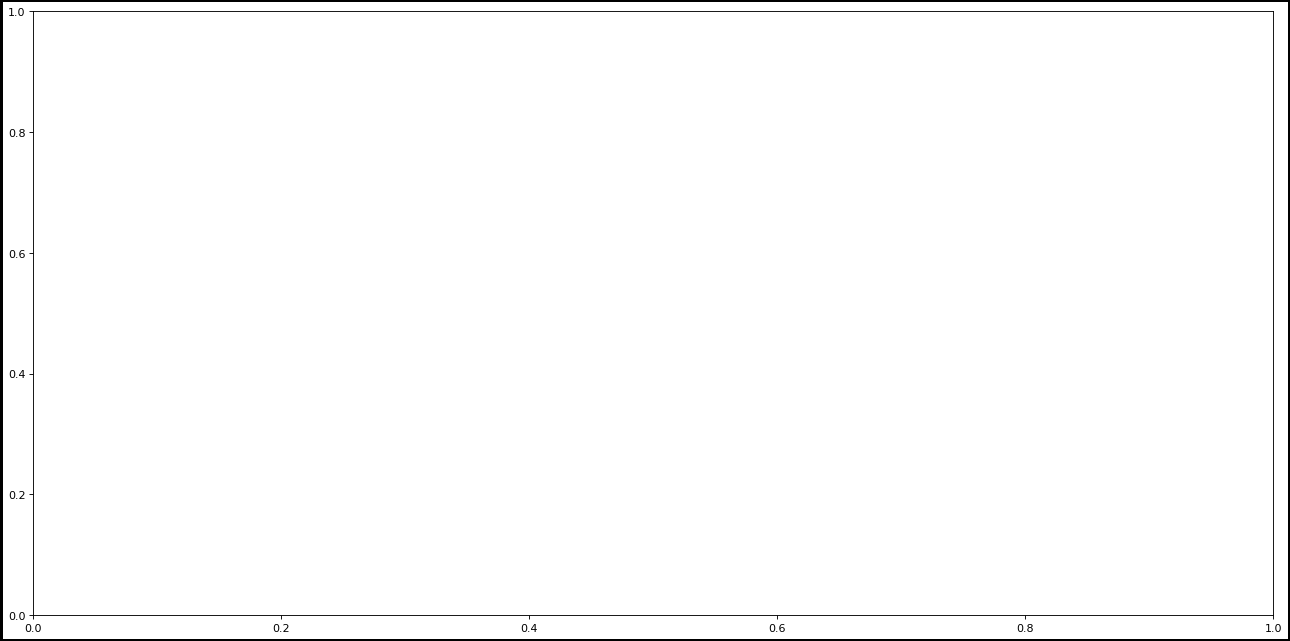

In [38]:
#Defining size, background color, edge color, resolution of the plot
fig = plt.figure(num=None, figsize=(20,10), dpi=80, facecolor='w', edgecolor='black',linewidth=3)

#Plotting X axis as Year and Y axes as competition indices
plt.plot( 'Year', 'Overall competition index', data=all_stats, marker='o', markerfacecolor='blue', markersize=8, color='skyblue', linewidth=4)
plt.plot( 'Year', 'Male competition index', data=all_stats, marker='', color='olive', linewidth=2)
plt.plot( 'Year', 'Female competition index', data=all_stats, marker='', color='r', linewidth=2,  label="Female competition index")

#Defining scale on X and Y axis
plt.xticks(np.arange(1896, 2015, 4))
plt.yticks(np.arange(0,1,0.05))

#Fine tuning legends and axis labels
plt.legend(prop={'size': 16})
plt.xlabel("Year")
plt.ylabel("Competition index")
plt.show()

#Saving generated plot as JPG image
#fig.savefig('test.jpg')